<a href="https://colab.research.google.com/github/314sirius/linked-in/blob/main/Reactions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reactions aren't enough, should check for comments on posts to see total engagement with authors and define with whom I interacted the most.

I web scrapped all the reactions on posts, but 600 links weren't able to attain.

* reactions_post.csv has all the data about posts but has mising values
* reactions_post_author has all the authors
* reactions_post_nan has all the rows without authors retriewed
* reactions_post_author_funny has only funny reactions, and i analized them here.



In [ ]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 6.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns
#import emoji

from wordcloud import WordCloud,STOPWORDS

In [ ]:
from google.colab import files

In [ ]:
# Upload your Connections.csv file here
uploaded=files.upload()

Saving Reactions.csv to Reactions.csv


In [ ]:
df = pd.read_csv('Reactions.csv', encoding = 'utf-8')
df

,Date,Type,Link
0,2025-04-21 16:00:30,ENTERTAINMENT,https://www.linkedin.com/feed/update/urn%3Ali%...
1,2025-04-21 13:31:19,LIKE,https://www.linkedin.com/feed/update/urn%3Ali%...
2,2025-04-21 12:03:58,ENTERTAINMENT,https://www.linkedin.com/feed/update/urn%3Ali%...
3,2025-04-21 09:28:16,ENTERTAINMENT,https://www.linkedin.com/feed/update/urn%3Ali%...
4,2025-04-21 08:10:19,LIKE,https://www.linkedin.com/feed/update/urn%3Ali%...
...,...,...,...
9738,2024-03-16 17:53:41,ENTERTAINMENT,https://www.linkedin.com/feed/update/urn%3Ali%...
9739,2024-03-15 09:04:55,LIKE,https://www.linkedin.com/feed/update/urn%3Ali%...
9740,2024-03-08 06:41:25,LIKE,https://www.linkedin.com/feed/update/urn%3Ali%...
9741,2024-03-05 09:14:23,LIKE,https://www.linkedin.com/feed/update/urn%3Ali%...


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
type(df.Date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9743 entries, 0 to 9742
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    9743 non-null   datetime64[ns]
 1   Type    9743 non-null   object        
 2   Link    9743 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 228.5+ KB


In [ ]:
daily_reaction_count = df.groupby(pd.Grouper(key='Date', freq='d'))['Type'].count()

# Print the result
daily_reaction_count

,Type
Date,
2024-02-27,1
2024-02-28,0
2024-02-29,0
2024-03-01,0
2024-03-02,0
...,...
2025-04-17,19
2025-04-18,27
2025-04-19,23


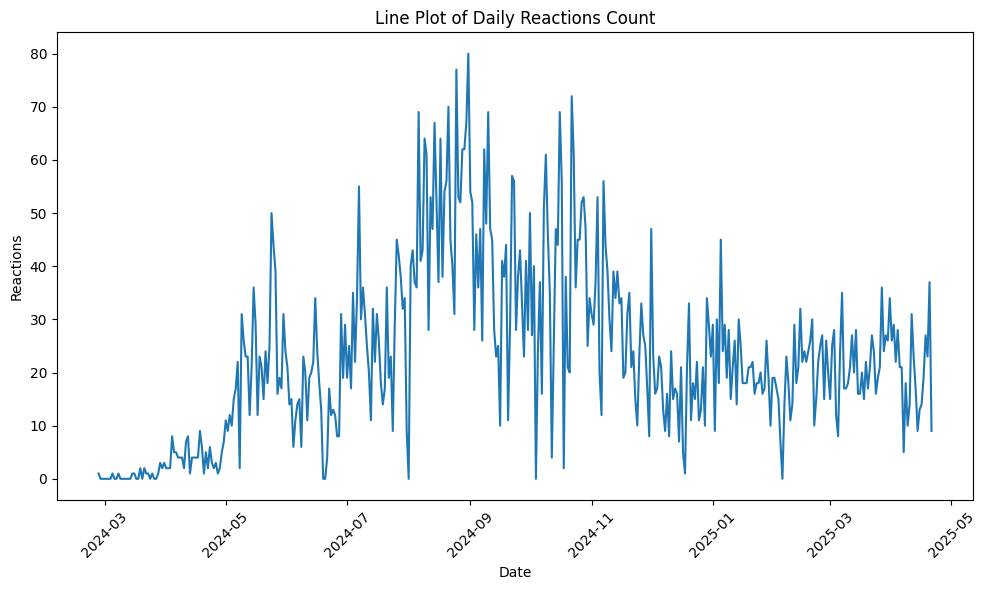

In [ ]:
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.plot(daily_reaction_count.index, daily_reaction_count.values)
plt.xlabel('Date')
plt.ylabel('Reactions')
plt.title('Line Plot of Daily Reactions Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [ ]:
daily_like_count = df[df['Type']=='LIKE'].groupby(pd.Grouper(key='Date', freq='d'))['Type'].count()
daily_funny_count = df[df['Type']=='ENTERTAINMENT'].groupby(pd.Grouper(key='Date', freq='d'))['Type'].count()
daily_love_count = df[df['Type']=='EMPATHY'].groupby(pd.Grouper(key='Date', freq='d'))['Type'].count()
daily_celebrate_count = df[df['Type']=='PRAISE'].groupby(pd.Grouper(key='Date', freq='d'))['Type'].count()
daily_support_count = df[df['Type']=='APPRECIATION'].groupby(pd.Grouper(key='Date', freq='d'))['Type'].count()
daily_insightfut_count = df[df['Type']=='INTEREST'].groupby(pd.Grouper(key='Date', freq='d'))['Type'].count()


# Print the result
daily_funny_count

,Type
Date,
2024-03-16,1
2024-03-17,0
2024-03-18,0
2024-03-19,0
2024-03-20,0
...,...
2025-04-17,4
2025-04-18,7
2025-04-19,10


In [ ]:
types=df.groupby(df['Type']).count()
types

,Date,Link
Type,,
APPRECIATION,13,13
EMPATHY,77,77
ENTERTAINMENT,3314,3314
INTEREST,34,34
LIKE,6266,6266
PRAISE,39,39


In [ ]:
monthly_count = df.groupby([pd.Grouper(key='Date', freq='ME'), 'Type']).count().unstack() # group by month and type, flip the table using .unstack()
monthly_count = monthly_count.fillna(0).astype(int) #fill NaN with 0, display integers
monthly_count.index = monthly_count.index.strftime('%B %Y') # display date as month and year.

monthly_count

Link                                            
Type           APPRECIATION EMPATHY ENTERTAINMENT INTEREST  LIKE PRAISE
Date                                                                   
February 2024             0       0             0        0     1      0
March 2024                0       1             1        0    18      0
April 2024                0       0            12        1   109      0
May 2024                  1       5           135        1   535      0
June 2024                 0       2           116        1   339      1
July 2024                 0       9           236        4   586      1
August 2024               0      11           447       10  1099      2
September 2024            1       9           430        5   707      4
October 2024              1       6           480        1   695      1
November 2024             0      13           376        1   465      7
December 2024             3      12           220        1   319      5
January 2025              4       4           282        3   359      7
February 2025             3       2           214        5   319      3
March 2025                0       2           228        0   440      6
April 2025                0       1           137        1   275      2

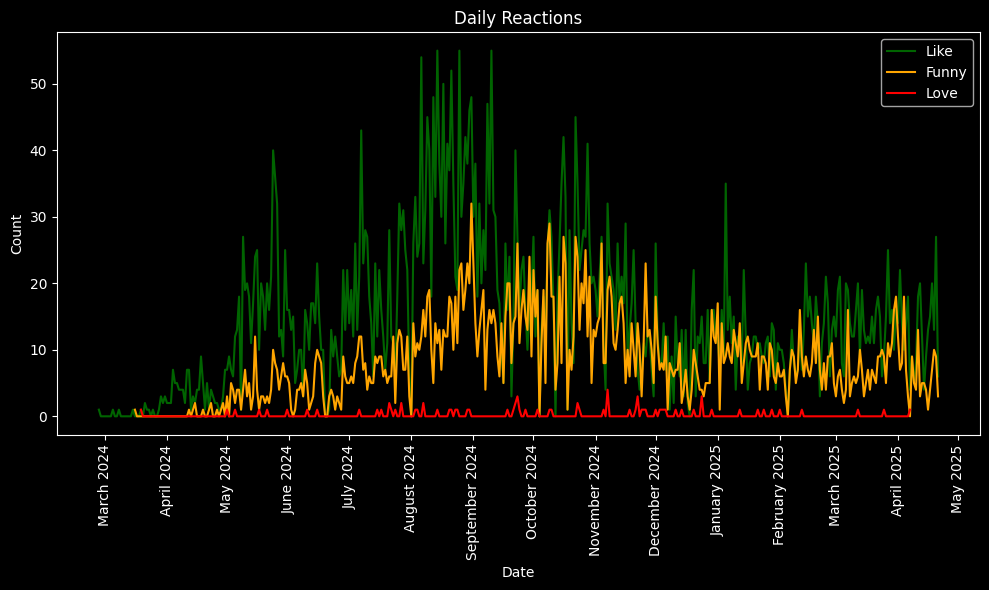

In [ ]:
import matplotlib.dates as mdates

plt.figure(figsize=(10, 6))  # Adjust figure size as needed
#plt.plot(daily_reaction_count.index, daily_reaction_count.values, label='Total Reactions')
plt.plot(daily_like_count.index, daily_like_count.values, label='Like',color='darkgreen')
plt.plot(daily_funny_count.index, daily_funny_count.values, label='Funny', color='orange')
#plt.plot(daily_celebrate_count.index, daily_celebrate_count.values, label='Celebrate')
#plt.plot(daily_support_count.index, daily_support_count.values, label='Support')
#plt.plot(daily_insightfut_count.index, daily_insightfut_count.values, label='Insightful')
plt.plot(daily_love_count.index, daily_love_count.values, label='Love', color='red')

plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Daily Reactions')

# Set x-axis ticks to be every month
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B %Y'))
plt.style.use('dark_background')

plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.legend() # Add a legend to distinguish the lines
plt.tight_layout()  # Adjust layout to prevent labels from overlapping


plt.show()


In [ ]:
df.head(5)

,Date,Type,Link
0,2025-04-21 16:00:30,ENTERTAINMENT,https://www.linkedin.com/feed/update/urn%3Ali%...
1,2025-04-21 13:31:19,LIKE,https://www.linkedin.com/feed/update/urn%3Ali%...
2,2025-04-21 12:03:58,ENTERTAINMENT,https://www.linkedin.com/feed/update/urn%3Ali%...
3,2025-04-21 09:28:16,ENTERTAINMENT,https://www.linkedin.com/feed/update/urn%3Ali%...
4,2025-04-21 08:10:19,LIKE,https://www.linkedin.com/feed/update/urn%3Ali%...


In [ ]:
#create df_comment with reactions to comments only

df_comment = df[df['Link'].str.contains('comment', na=False)]
df_comment

,Date,Type,Link
1,2025-04-21 13:31:19,LIKE,https://www.linkedin.com/feed/update/urn%3Ali%...
6,2025-04-21 07:03:55,LIKE,https://www.linkedin.com/feed/update/urn%3Ali%...
7,2025-04-21 06:51:27,LIKE,https://www.linkedin.com/feed/update/urn%3Ali%...
8,2025-04-21 06:51:02,LIKE,https://www.linkedin.com/feed/update/urn%3Ali%...
9,2025-04-20 20:02:51,LIKE,https://www.linkedin.com/feed/update/urn%3Ali%...
...,...,...,...
9715,2024-04-04 06:56:53,LIKE,https://www.linkedin.com/feed/update/urn%3Ali%...
9716,2024-04-03 21:09:21,LIKE,https://www.linkedin.com/feed/update/urn%3Ali%...
9717,2024-04-03 18:18:32,LIKE,https://www.linkedin.com/feed/update/urn%3Ali%...
9729,2024-03-29 09:20:22,LIKE,https://www.linkedin.com/feed/update/urn%3Ali%...


In [ ]:
# create df_post with the reactions to posts only
df_post=df[~df['Link'].str.contains('comment', na=False)]
df_post

,Date,Type,Link
0,2025-04-21 16:00:30,ENTERTAINMENT,https://www.linkedin.com/feed/update/urn%3Ali%...
2,2025-04-21 12:03:58,ENTERTAINMENT,https://www.linkedin.com/feed/update/urn%3Ali%...
3,2025-04-21 09:28:16,ENTERTAINMENT,https://www.linkedin.com/feed/update/urn%3Ali%...
4,2025-04-21 08:10:19,LIKE,https://www.linkedin.com/feed/update/urn%3Ali%...
5,2025-04-21 08:08:31,LIKE,https://www.linkedin.com/feed/update/urn%3Ali%...
...,...,...,...
9738,2024-03-16 17:53:41,ENTERTAINMENT,https://www.linkedin.com/feed/update/urn%3Ali%...
9739,2024-03-15 09:04:55,LIKE,https://www.linkedin.com/feed/update/urn%3Ali%...
9740,2024-03-08 06:41:25,LIKE,https://www.linkedin.com/feed/update/urn%3Ali%...
9741,2024-03-05 09:14:23,LIKE,https://www.linkedin.com/feed/update/urn%3Ali%...


In [ ]:
# check that you correctly split df into 2 categories, and there is no inconsistent links.
df_comment.shape[0]+df_post.shape[0]==df.shape[0]

True

# Web scrap only once, save result in .csv to analize later

In [ ]:
# Use this to web scrap

import time
import random

import requests
from bs4 import BeautifulSoup

def get_author_and_text(link):
    try:
        # Introduce a random delay between 2 and 5 seconds
        delay = random.uniform(1, 3)
        time.sleep(delay)

        response = requests.get(link)
        response.raise_for_status()
        soup = BeautifulSoup(response.content, 'html.parser')
        author_element = soup.find('div', class_='text-color-text')
        if author_element:
            author = author_element.text.strip() # Extract author, removing trailing characters
            text_element = soup.find('div', class_='attributed-text-segment-list__container relative mt-1 mb-1.5 babybear:mt-0 babybear:mb-0.5') # Example selector, adjust if needed
            if text_element:
                text = text_element.get_text(strip=True)
            else:
                text = "Text not found"
            return author, text
        else:
            return "Author not found", "Text not found"
    except Exception as e:
        print(f"Error processing {link}: {e}")
        return np.nan, np.nan # Return NaN for both author and text in case of error

# Example usage (assuming df500 and 'Link' column exist):
# Apply the function with a delay

In [ ]:
get_author_and_text(df_post['Link'][0])

('Ralph Aboujaoude Diaz',
 'Honestly, I always considered myself as a ‚Äúbeta male‚Äù. At least betas are more stable, better tested, socially functional, and people actually enjoy their company.#technology#software#workplaceFollow me if you are looking for an honest, sarcastic and funny perspective on¬†technology and workplace. Hit the \uf8ffüîî on my profile to get a notification for all my new posts')

In [ ]:
author_text_data = df_post['Link'].apply(get_author_and_text)

# Split the tuple into two columns
df_post[['Author', 'Post']] = pd.DataFrame(author_text_data.tolist(), index=df_post.index)

In [ ]:
df_post.to_csv('reactions_post.csv', encoding = 'utf-8')
files.download('reactions_post.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# prompt: create a df_nan containing all the rows from df_post with the NaN values or ''Author not found'

df_nan = df_post[df_post['Author'].isnull() | (df_post['Author'] == 'Author not found')]


In [ ]:
df_nan

,Date,Type,Link,Author,Post
68,2025-04-19 08:19:34,ENTERTAINMENT,https://www.linkedin.com/feed/update/urn%3Ali%...,NaN,NaN
190,2025-04-12 06:10:13,LIKE,https://www.linkedin.com/feed/update/urn%3Ali%...,NaN,NaN
230,2025-04-10 07:42:30,ENTERTAINMENT,https://www.linkedin.com/feed/update/urn%3Ali%...,Author not found,Text not found
401,2025-04-01 14:34:36,ENTERTAINMENT,https://www.linkedin.com/feed/update/urn%3Ali%...,Author not found,Text not found
408,2025-04-01 10:45:04,ENTERTAINMENT,https://www.linkedin.com/feed/update/urn%3Ali%...,NaN,NaN
...,...,...,...,...,...
9734,2024-03-21 08:45:14,LIKE,https://www.linkedin.com/feed/update/urn%3Ali%...,NaN,NaN
9735,2024-03-21 07:53:16,LIKE,https://www.linkedin.com/feed/update/urn%3Ali%...,Author not found,Text not found
9737,2024-03-19 08:24:32,LIKE,https://www.linkedin.com/feed/update/urn%3Ali%...,NaN,NaN
9739,2024-03-15 09:04:55,LIKE,https://www.linkedin.com/feed/update/urn%3Ali%...,NaN,NaN


In [ ]:
df_nan.to_csv('reactions_post_nan.csv', encoding = 'utf-8')
files.download('reactions_post_nan.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# prompt: create df_post_author that is df_post - df_nan

df_post_author = df_post[~(df_post['Author'].isnull() | (df_post['Author'] == 'Author not found'))]


In [ ]:
df_post_author

,Date,Type,Link,Author,Post
0,2025-04-21 16:00:30,ENTERTAINMENT,https://www.linkedin.com/feed/update/urn%3Ali%...,Ralph Aboujaoude Diaz,"Honestly, I always considered myself as a ‚Äúb..."
2,2025-04-21 12:03:58,ENTERTAINMENT,https://www.linkedin.com/feed/update/urn%3Ali%...,Ralph Aboujaoude Diaz,A rare picture of Sam Altman bravely facing th...
3,2025-04-21 09:28:16,ENTERTAINMENT,https://www.linkedin.com/feed/update/urn%3Ali%...,Ken Cheng,I reprimanded an employee for watching YouTube...
4,2025-04-21 08:10:19,LIKE,https://www.linkedin.com/feed/update/urn%3Ali%...,Dion Wiggins,üß† The Era of the AI Idiot\n\nEveryone‚Äôs a...
5,2025-04-21 08:08:31,LIKE,https://www.linkedin.com/feed/update/urn%3Ali%...,Noel Hoey,"One year ago today, I arrived back in Dublin a..."
...,...,...,...,...,...
9732,2024-03-23 07:19:06,LIKE,https://www.linkedin.com/feed/update/urn%3Ali%...,AI Echo,ùêàùêßùê¨ùê¢ùê†ùê°ùê≠ùêüùêÆùê• ùêù...
9736,2024-03-19 08:29:50,EMPATHY,https://www.linkedin.com/feed/update/urn%3Ali%...,European Parliament,"""Green""üü¢, ""Eco-friendly""üå±, ""Sustainable""..."
9738,2024-03-16 17:53:41,ENTERTAINMENT,https://www.linkedin.com/feed/update/urn%3Ali%...,Linas Beli≈´nas,This is brilliant! This ad on the current AI b...
9740,2024-03-08 06:41:25,LIKE,https://www.linkedin.com/feed/update/urn%3Ali%...,Alex Vesyoliy,"Thank you to all girls, ladies & women! Congra..."


In [ ]:
df_post_author.to_csv('reactions_post_author.csv', encoding = 'utf-8')
files.download('reactions_post_author.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_post_author_funny = df_post_author[df_post_author['Type']=='ENTERTAINMENT']

In [ ]:
df_post_author_funny.to_csv('reactions_post_author_funny.csv', encoding = 'utf-8')
files.download('reactions_post_author_funny.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Reactions to posts with known authors

In [ ]:
#upload reaction_post_author_funny.csv

uploaded=files.upload()

Saving reactions_post_author.csv to reactions_post_author.csv


In [ ]:
df_post_author = pd.read_csv('reactions_post_author.csv', encoding = 'utf-8')

df_post_author.value_counts('Author')

,count
Author,
Ralph Aboujaoude Diaz,212
Marcus Scholle,162
Stephen Telford,141
Andreas Horn,136
Eduardo Ordax,111
...,...
Herb Thompson,1
Help A Teacher,1
Helen Richards,1


In [ ]:
df_post_author['Date'] = pd.to_datetime(df_post_author['Date'])

In [ ]:
df_post_author.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4943 entries, 0 to 4942
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  4943 non-null   int64         
 1   Date        4943 non-null   datetime64[ns]
 2   Type        4943 non-null   object        
 3   Link        4943 non-null   object        
 4   Author      4943 non-null   object        
 5   Post        4943 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 231.8+ KB


In [ ]:
# authors that has more than 20 funny reactions

author_counts = df_post_author.value_counts('Author')
print(author_counts[author_counts > 28])


Author
Ralph Aboujaoude Diaz             212
Marcus Scholle                    162
Stephen Telford                   141
Andreas Horn                      136
Eduardo Ordax                     111
Ross Sullivan                      87
Gabriel Ryan, FRM                  80
Stuart Todd                        80
Jack Kuveke                        71
Vlad Bronnikov                     65
Ken Cheng                          58
Kasra Jadid Haghighi               47
Jacek Smoluch                      40
Maho Pacheco                       39
Michael Cassidy                    37
Jenna H C.                         37
Alvin Foo                          37
David P.                           35
Alex Shahlaei-Beechingüçäüï∞     34
Marc Duckeck                       34
Dean Hardy-White                   32
Michael J. Kainatsky               32
Jeff Hatten üéâ                   31
Matt Shewbridge                    30
Stephen Watson                     29
The Female Quotient                29
Name:

In [ ]:
# leave df with the authors that have more than 28 reactions

author_counts = df_post_author['Author'].value_counts()
authors_with_more_than_28_reactions = author_counts[author_counts > 28].index
df_filtered = df_post_author[df_post_author['Author'].isin(authors_with_more_than_28_reactions)]


In [ ]:
#authors with >28 total reactions
df_filtered

,Unnamed: 0,Date,Type,Link,Author,Post
0,0,2025-04-21 16:00:30,ENTERTAINMENT,https://www.linkedin.com/feed/update/urn%3Ali%...,Ralph Aboujaoude Diaz,"Honestly, I always considered myself as a ‚Äúb..."
1,2,2025-04-21 12:03:58,ENTERTAINMENT,https://www.linkedin.com/feed/update/urn%3Ali%...,Ralph Aboujaoude Diaz,A rare picture of Sam Altman bravely facing th...
2,3,2025-04-21 09:28:16,ENTERTAINMENT,https://www.linkedin.com/feed/update/urn%3Ali%...,Ken Cheng,I reprimanded an employee for watching YouTube...
8,17,2025-04-20 16:00:30,ENTERTAINMENT,https://www.linkedin.com/feed/update/urn%3Ali%...,"Gabriel Ryan, FRM",Think twice before bringing your kids to the o...
14,62,2025-04-19 14:55:28,ENTERTAINMENT,https://www.linkedin.com/feed/update/urn%3Ali%...,"Gabriel Ryan, FRM","As a leader, emotional intelligence is importa..."
...,...,...,...,...,...,...
4887,9657,2024-04-16 11:41:12,LIKE,https://www.linkedin.com/feed/update/urn%3Ali%...,Ralph Aboujaoude Diaz,And that‚Äôs how we know that a chatbot has re...
4895,9667,2024-04-14 07:28:49,LIKE,https://www.linkedin.com/feed/update/urn%3Ali%...,Kasra Jadid Haghighi,üåü Meet Origaker: The Shape-Shifting Robot ...
4896,9669,2024-04-12 14:57:18,ENTERTAINMENT,https://www.linkedin.com/feed/update/urn%3Ali%...,Ralph Aboujaoude Diaz,Irrefutable evidence of Mark Zuckerberg‚Äôs at...
4901,9678,2024-04-11 17:40:19,LIKE,https://www.linkedin.com/feed/update/urn%3Ali%...,Kasra Jadid Haghighi,For those developers 'Its not my bug' ! üòÅ‚Ä...


## Cleaning columns of extra characters (emojies that weren't recognized during scraping)

In [ ]:
# removes any characters except alphabet and space from Author's name

import re

df_filtered['Author'] = df_filtered['Author'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', str(x)))


<ipython-input-107-543c9cae2c0e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Author'] = df_filtered['Author'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', str(x)))


In [ ]:
df_filtered['Cleaned_Post'] = df_filtered['Post'].apply(lambda x: re.sub(r'[^a-zA-Z\s#0-9\.,;:!?"]', '', str(x))) #regex includes \s space and #


<ipython-input-108-72bdff86cbed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Cleaned_Post'] = df_filtered['Post'].apply(lambda x: re.sub(r'[^a-zA-Z\s#0-9\.,;:!?"]', '', str(x))) #regex includes \s space and #


In [ ]:
# prompt: change regex r'[^a-zA-Z\s#]' to include punctuation and numbers show me one line of code

df_filtered['Cleaned_Post'] = df_filtered['Post'].apply(lambda x: re.sub(r'[^a-zA-Z\s#0-9\.,!?"]', '', str(x)))


<ipython-input-109-90c5895e743f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Cleaned_Post'] = df_filtered['Post'].apply(lambda x: re.sub(r'[^a-zA-Z\s#0-9\.,!?"]', '', str(x)))


In [ ]:
df_filtered.head(2)

,Unnamed: 0,Date,Type,Link,Author,Post,Cleaned_Post
0,0,2025-04-21 16:00:30,ENTERTAINMENT,https://www.linkedin.com/feed/update/urn%3Ali%...,Ralph Aboujaoude Diaz,"Honestly, I always considered myself as a ‚Äúb...","Honestly, I always considered myself as a beta..."
1,2,2025-04-21 12:03:58,ENTERTAINMENT,https://www.linkedin.com/feed/update/urn%3Ali%...,Ralph Aboujaoude Diaz,A rare picture of Sam Altman bravely facing th...,A rare picture of Sam Altman bravely facing th...


In [ ]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1726 entries, 0 to 4903
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    1726 non-null   int64         
 1   Date          1726 non-null   datetime64[ns]
 2   Type          1726 non-null   object        
 3   Link          1726 non-null   object        
 4   Author        1726 non-null   object        
 5   Post          1726 non-null   object        
 6   Cleaned_Post  1726 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 107.9+ KB


## Pivot table of months-authors and my reactions count

In [ ]:
# create pivot table with value counts

pivot_table = df_filtered.pivot_table(index=pd.Grouper(key='Date', freq='ME'),
                                     columns='Author',
                                     values='Type',
                                     aggfunc='count',
                                     fill_value=0)

pivot_table.index = pd.to_datetime(pivot_table.index, format='%ME-%Y')

pivot_table

pivot_table.index

DatetimeIndex(['2024-04-30', '2024-05-31', '2024-06-30', '2024-07-31',
               '2024-08-31', '2024-09-30', '2024-10-31', '2024-11-30',
               '2024-12-31', '2025-01-31', '2025-02-28', '2025-03-31',
               '2025-04-30'],
              dtype='datetime64[ns]', name='Date', freq='ME')

In [ ]:
pivot_table.shape

(13, 26)

## Heatmap of 28+ reactions for 26 authors

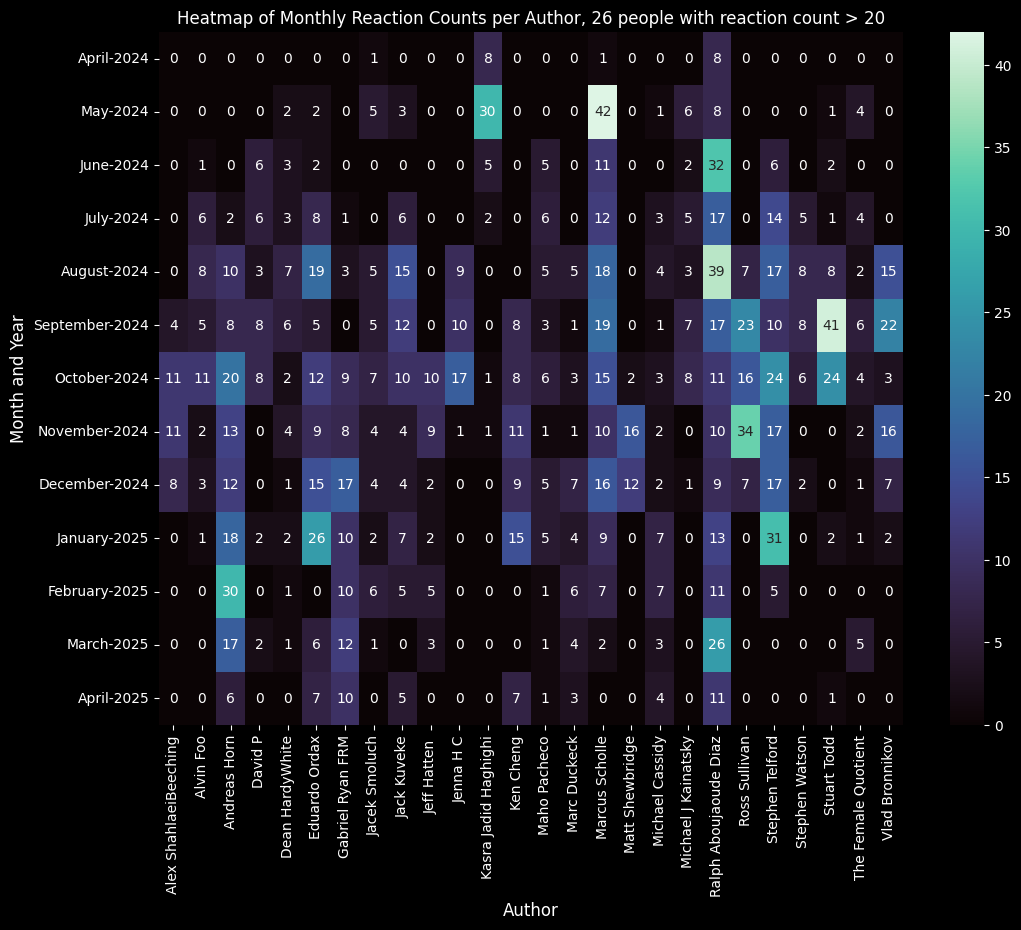

In [ ]:
# prompt: make a heat map from pivot_table change month style to month and year

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

if not isinstance(pivot_table.index, pd.Index):
    pivot_table.index = pd.Index(pivot_table.index)

plt.figure(figsize=(12, 9))
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="mako", yticklabels=pivot_table.index.strftime('%B-%Y'))
plt.title(f'Heatmap of Monthly Reaction Counts per Author, {pivot_table.shape[1]} people with reaction count > 28')
plt.xlabel('Author', fontsize=12)
plt.ylabel('Month and Year', fontsize=12) # Changed the label

plt.style.use('dark_background')

plt.xticks(rotation=90)#, ha='right') # Rotated x-axis labels for better readability
#plt.tight_layout()
plt.show()


<ipython-input-176-47bbd8bc4ef6>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Date'] = pd.to_datetime(df_filtered['Date'])
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 63743 (\uf8ff) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 63743 (\uf8ff) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 63743 (\uf8ff) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


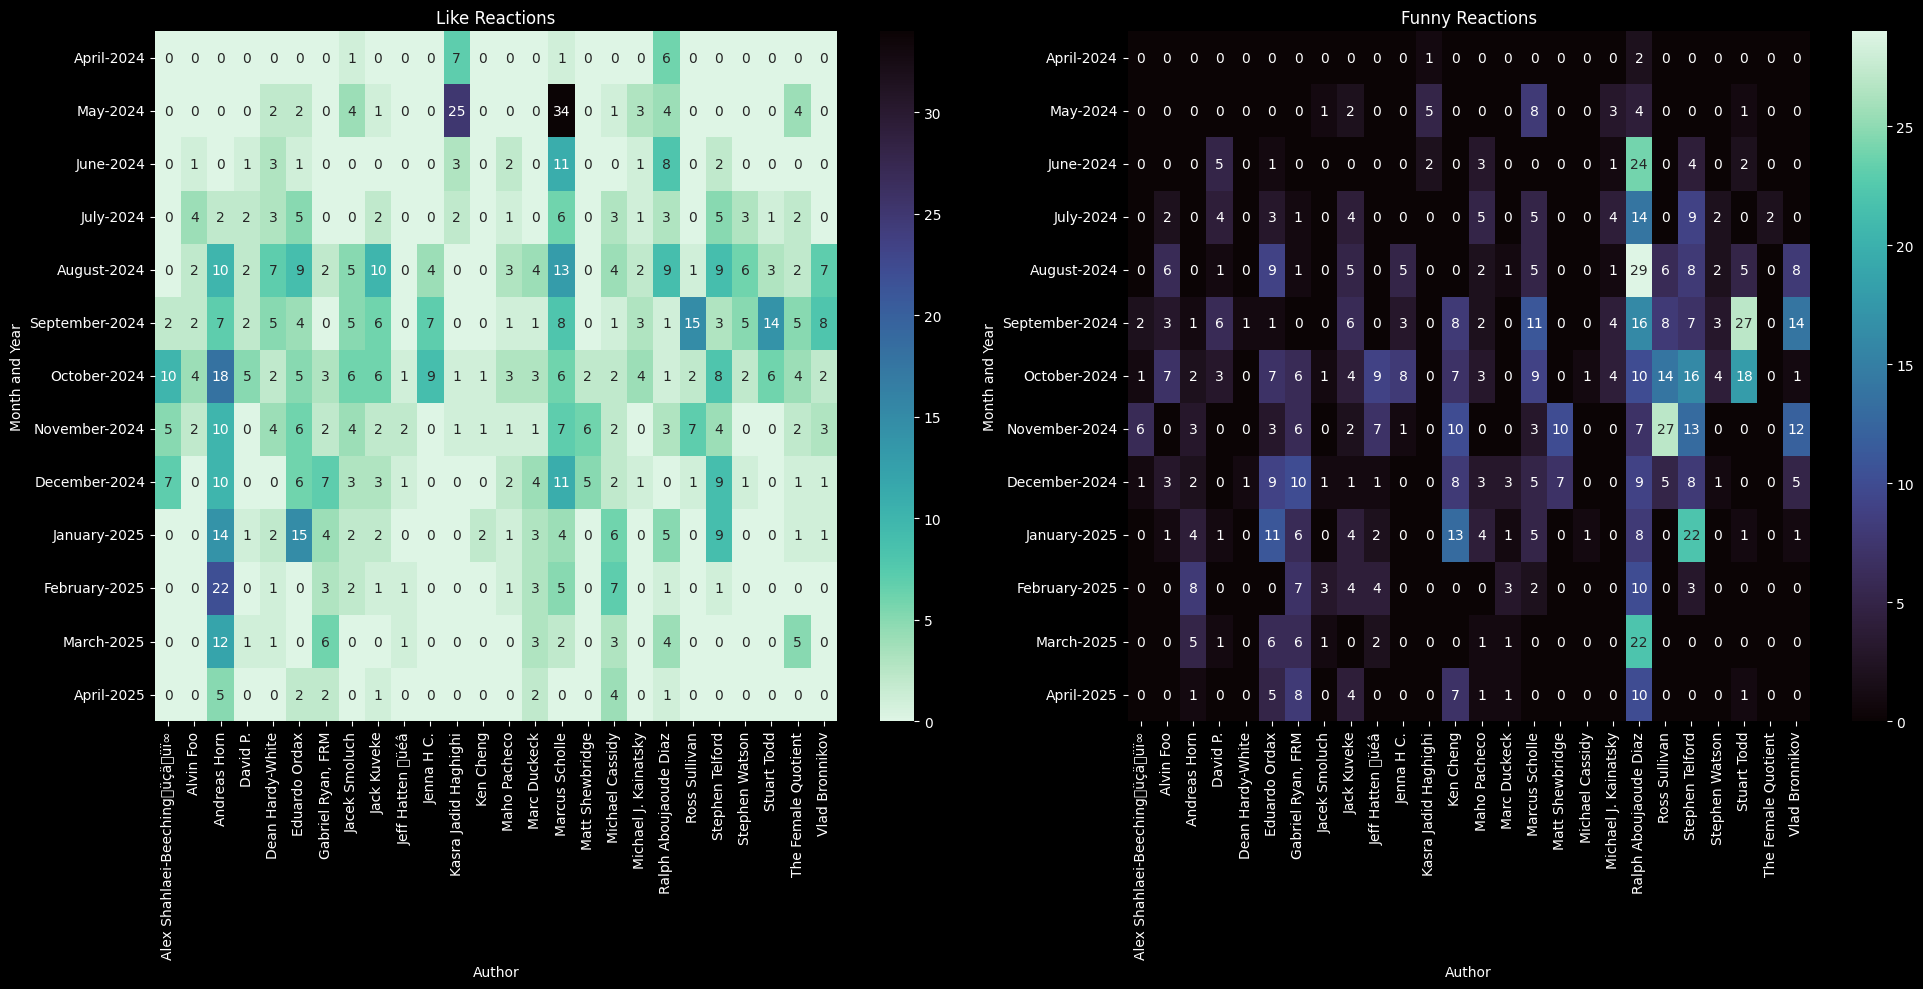

In [ ]:
#
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_filtered is your DataFrame with 'Date', 'Author', and 'Type' columns
# and you have 'LIKE' and 'ENTERTAINMENT' reaction types

# Convert 'Date' column to datetime objects if not already
df_filtered['Date'] = pd.to_datetime(df_filtered['Date'])

# Create pivot tables for 'LIKE' and 'ENTERTAINMENT' reactions
pivot_like = df_filtered[df_filtered['Type'] == 'LIKE'].pivot_table(
    index=pd.Grouper(key='Date', freq='ME'),
    columns='Author',
    values='Type',
    aggfunc='count',
    fill_value=0
)

pivot_funny = df_filtered[df_filtered['Type'] == 'ENTERTAINMENT'].pivot_table(
    index=pd.Grouper(key='Date', freq='ME'),
    columns='Author',
    values='Type',
    aggfunc='count',
    fill_value=0
)


# Combine the pivot tables side-by-side
pivot_combined = pd.concat([pivot_like, pivot_funny], axis=1, keys=['Like', 'Funny'])

# Plotting the heatmaps side-by-side
fig, axes = plt.subplots(1, 2, figsize=(20, 10))  # Adjust figure size

# Plot like reactions heatmap
sns.heatmap(pivot_like, annot=True, fmt="d", cmap="mako_r", ax=axes[0], yticklabels=pivot_like.index.strftime('%B-%Y'))
axes[0].set_title('Like Reactions')
axes[0].set_xlabel('Author')
axes[0].set_ylabel('Month and Year')
plt.setp(axes[0].get_xticklabels(), rotation=90)#, ha="right")

#Plot funny reactions heatmap
sns.heatmap(pivot_funny, annot=True, fmt="d", cmap="mako", ax=axes[1], yticklabels=pivot_funny.index.strftime('%B-%Y'))
axes[1].set_title('Funny Reactions')
axes[1].set_xlabel('Author')
axes[1].set_ylabel('Month and Year')
plt.setp(axes[1].get_xticklabels(), rotation=90)#, ha="right")

plt.tight_layout()
plt.show()



In [ ]:
# Group by author and count the total 'LIKE' and 'ENTERTAINMENT' reactions
reaction_counts = df_filtered.groupby('Author')['Type'].value_counts().unstack(fill_value=0)

# Calculate the total funny and like reactions
reaction_counts['Total Funny'] = reaction_counts['ENTERTAINMENT']
reaction_counts['Total Likes'] = reaction_counts['LIKE']
reaction_counts['Total Reactions'] = reaction_counts['Total Funny'] + reaction_counts['Total Likes']

# Sort by total reactions in descending order
reaction_counts = reaction_counts.sort_values('Total Reactions', ascending=False)

# Display the result
print(reaction_counts[['Total Funny', 'Total Likes', 'Total Reactions']])


Type                            Total Funny  Total Likes  Total Reactions
Author                                                                   
Ralph Aboujaoude Diaz                   165           46              211
Marcus Scholle                           53          108              161
Stephen Telford                          90           50              140
Andreas Horn                             26          110              136
Eduardo Ordax                            55           55              110
Ross Sullivan                            60           26               86
Gabriel Ryan, FRM                        51           29               80
Stuart Todd                              55           24               79
Jack Kuveke                              36           34               70
Vlad Bronnikov                           41           22               63
Ken Cheng                                53            4               57
Kasra Jadid Haghighi                  

# Sentiment analysis of Posts

## basic sentiment without tuning

In [ ]:
def preprocess_text(text):
    """Preprocesses text for sentiment analysis."""
    if not isinstance(text, str):  # Handle non-string inputs
        return ""

    # Lowercasing
    text = text.lower()

    # Removing URLs
    text = re.sub(r'http\S+', '', text)

    # Removing mentions (@usernames)
    text = re.sub(r'@\w+', '', text)

    # Removing hashtags (#hashtags) -  Decide if you want to keep or remove
    text = re.sub(r'#\w+', '', text)

    # Removing special characters and punctuation (except for spaces)
    text = re.sub(r'[^\w\s]', '', text)

    # Removing extra whitespace
    text = ' '.join(text.split())

    return text


# Apply the preprocessing function to the 'ShareCommentary' column
df_filtered['Cleaned_Post'] = df_filtered['Post'].apply(preprocess_text)
df_filtered.head(2)

<ipython-input-147-44790e2e215a>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Cleaned_Post'] = df_filtered['Post'].apply(preprocess_text)


,Unnamed: 0,Date,Type,Link,Author,Post,Cleaned_Post
0,0,2025-04-21 16:00:30,ENTERTAINMENT,https://www.linkedin.com/feed/update/urn%3Ali%...,Ralph Aboujaoude Diaz,"Honestly, I always considered myself as a ‚Äúb...",honestly i always considered myself as a äúbet...
1,2,2025-04-21 12:03:58,ENTERTAINMENT,https://www.linkedin.com/feed/update/urn%3Ali%...,Ralph Aboujaoude Diaz,A rare picture of Sam Altman bravely facing th...,a rare picture of sam altman bravely facing th...


In [ ]:
!pip install transformers
!pip install tqdm

import pandas as pd
import re
from transformers import pipeline
from tqdm import tqdm

# Assuming df and the 'Message_no_link' column are already defined as in your code

# Load the sentiment analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

# Function to analyze sentiment with progress bar
def analyze_sentiment_with_progress(messages):
    sentiments = []
    for message in tqdm(messages, desc="Analyzing sentiment"):
      try:
        sentiments.append(sentiment_pipeline(message)[0])
      except Exception as e:
        print(f"Error analyzing: {message}. Error:{e}")
        sentiments.append({'label':'ERROR', 'score':0})
    return sentiments

# Analyze sentiment with progress bar
#df_filtered['Sentiment'] = analyze_sentiment_with_progress(df['Cleaned_Post'].astype(str))
#df_filtered

sentiment_results = analyze_sentiment_with_progress(df_filtered['Cleaned_Post'].astype(str))

df_filtered[['Sentiment_Label', 'Sentiment_Score']] = pd.DataFrame(
    [(result['label'], result['score']) for result in sentiment_results],
    index=df_filtered.index
)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu
Analyzing sentiment:   2%|▏         | 39/1726 [00:08<04:49,  5.82it/s]

Error analyzing: want to learn machine learning from scratch start here if youäôre feeling overwhelmed about where to begin iäôve got you covered this curated playlist of 30 youtube videos is perfect for building a solid foundation in ml one standout is äúmachine learning teach by doingäù äî a fantastic resource that helps you grasp both the theory and the practical coding skills youäôll need check it out and take your first steps into the world of ml 1 introduction to machine learning teach by doinglnkdingqn2pmx52 what is machine learning history of machine learninglnkdingvpnsakh3 types of ml modelslnkdingsy2mchm4 6 steps of any ml projectlnkdinggcgchpq5 install python and vscode and run your first codelnkdingyic7j7b6 linear classifiers part 1lnkdingydfd97d7 linear classifiers part 2lnkdingac_zg88 jupyter notebook numpy and scikitlearnlnkdingwrac_tb9 running the random linear classifier algorithm in pythonlnkding5hacbfc10 the oldest ml model perceptronlnkdingpce6uft11 coding the perce

Analyzing sentiment:  46%|████▌     | 795/1726 [03:06<02:55,  5.32it/s]

Error analyzing: i have always tried to keep it genuine here on linkedin i did not come here to be äúpopularäù or to be bombarded with desperate asks i came here to share to connect provide some of my wisdom for free via my posts and to be myself but lately i am feeling exhausted by the steady tide of negativity and insincerity and it is hitting harder as i am navigating some tough personal family issues with dementia most days humor is what i use to cope you see the posts but it has been a tough run behind the scenes family issues handling challenges with the va for my veteran parents endless medical and housing bills for them frustrated with our own government everyday things that are not easily solved and yeah the cybersecurity world has made me careful about trust and for good reason i did not think opening up would feel so raw i took a chance when i joined linkedin stepping out from an alias and leaving behind a million followers on another platform to try this out in the open to 

Analyzing sentiment:  59%|█████▉    | 1024/1726 [03:50<02:57,  3.95it/s]

Error analyzing: üö beware of fake it cybersecurity job offers key red flags in todayäôs job market especially with the rise of remote work itäôs becoming easier for scammers to target professionals in it and cybersecurity while we all want to jump on an exciting opportunity itäôs critical to stay alert for fraudsters looking to steal your personal information or even your money if youäôre in the job hunt here are some major red flags to watch out for 1 emails from free accounts a legit recruiter will almost always use a business email if you get an email from gmail yahoo or other free services thatäôs a red flag pay close attention to the emailäôs quality too poor grammar random capitalization or weird attachments could signal that someoneäôs trying to scam you 2 money requests or odd personal information if a recruiter asks you to send money or personal information like your social security number upfront run this includes asking for your banking info to äúset upäù payroll one common

Analyzing sentiment:  68%|██████▊   | 1182/1726 [04:22<01:08,  7.93it/s]

Error analyzing: ùóùóµùóæùòåäôùòä ùóµùóºùòå ùòñùóµùóæùòåäôùòä ùóªùóºùòå ùóæùóªùó ùòñùóµùóæùòåäôùòä ùóªùóùòöùòå ùóùóª ùóùóªùòåùóùóøùóωùóøùóùòäùó ùóîùóú just got off the stage at the äûaiml forum in tallinnäú where i had the opportunity to discuss the state of ai in the enterprise with some of the brightest minds in european tech ùóú ùòñùóæùóªùòå ùòåùóº ùóùòöùòåùóùóªùó ùóæ ùóµùòçùóùó ùòåùóµùóæùóªùó ùòüùóºùòç ùòåùóº ùóùòü ùóæùóùóæùòáùóùóªùó ùóùóùóπùóπùóºùòñ ùóωùóæùóªùóùóπùóùòäùòåùòächristian reilly cto emea äîcloudflareagur jµgi cto äîpipedriveken tilk head of global data ai äînortaland of course a special shoutout toindrek vainuhead of conversational äîzurich insurance for his excellent moderation and for keeping our discussion focused and engaging here are some key takeaways from our panel discussion áôè 1ôèécurrent state of ai since chatgpts launch in late 2022 ais capabilities have accelerated with 2023 focused on pilots in 2024 the priority is roi and scaling generative ai into produ

Analyzing sentiment:  77%|███████▋  | 1330/1726 [04:53<00:46,  8.44it/s]

Error analyzing: a linguistic post about a brief comparison of three major logographic scripts existing in human history with my own biased observations each script evolved from simple images to more abstract forms cuneiform became syllabic hieroglyphs incorporated logographic and alphabetic elements chinese characters was developed as a mix of logographic and phonetic components and continue to be actively used today the characteristics of each script are distinctive mesopotamian cuneiform c 3200 bce is the earliest of the three it emerged in the fertile region between the tigris and euphrates riversprimarily in modernday iraq it was inscribed on clay tablets and began as detailed pictographs representing objects like fish and arrows over time symbols became abstract and geometric for efficient recordkeeping cuneiform gradually died out around the 1st century ce egyptian hieroglyphs c 3100 bce dated back to around 3100 bce and were predominantly carved on temple walls tombs and writte

Analyzing sentiment: 100%|██████████| 1726/1726 [06:24<00:00,  4.49it/s]
<ipython-input-148-86871ee27c7d>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[['Sentiment_Label', 'Sentiment_Score']] = pd.DataFrame(
<ipython-input-148-86871ee27c7d>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[['Sentiment_Label', 'Sentiment_Score']] = pd.DataFrame(


In [ ]:
df_filtered

,Unnamed: 0,Date,Type,Link,Author,Post,Cleaned_Post,Sentiment_Label,Sentiment_Score
0,0,2025-04-21 16:00:30,ENTERTAINMENT,https://www.linkedin.com/feed/update/urn%3Ali%...,Ralph Aboujaoude Diaz,"Honestly, I always considered myself as a ‚Äúb...",honestly i always considered myself as a äúbet...,POSITIVE,0.943981
1,2,2025-04-21 12:03:58,ENTERTAINMENT,https://www.linkedin.com/feed/update/urn%3Ali%...,Ralph Aboujaoude Diaz,A rare picture of Sam Altman bravely facing th...,a rare picture of sam altman bravely facing th...,POSITIVE,0.903346
2,3,2025-04-21 09:28:16,ENTERTAINMENT,https://www.linkedin.com/feed/update/urn%3Ali%...,Ken Cheng,I reprimanded an employee for watching YouTube...,i reprimanded an employee for watching youtube...,NEGATIVE,0.865473
8,17,2025-04-20 16:00:30,ENTERTAINMENT,https://www.linkedin.com/feed/update/urn%3Ali%...,"Gabriel Ryan, FRM",Think twice before bringing your kids to the o...,think twice before bringing your kids to the o...,NEGATIVE,0.988374
14,62,2025-04-19 14:55:28,ENTERTAINMENT,https://www.linkedin.com/feed/update/urn%3Ali%...,"Gabriel Ryan, FRM","As a leader, emotional intelligence is importa...",as a leader emotional intelligence is importan...,POSITIVE,0.995524
...,...,...,...,...,...,...,...,...,...
4887,9657,2024-04-16 11:41:12,LIKE,https://www.linkedin.com/feed/update/urn%3Ali%...,Ralph Aboujaoude Diaz,And that‚Äôs how we know that a chatbot has re...,and thatäôs how we know that a chatbot has rea...,NEGATIVE,0.942266
4895,9667,2024-04-14 07:28:49,LIKE,https://www.linkedin.com/feed/update/urn%3Ali%...,Kasra Jadid Haghighi,üåü Meet Origaker: The Shape-Shifting Robot ...,üåü meet origaker the shapeshifting robot üñ o...,POSITIVE,0.995750
4896,9669,2024-04-12 14:57:18,ENTERTAINMENT,https://www.linkedin.com/feed/update/urn%3Ali%...,Ralph Aboujaoude Diaz,Irrefutable evidence of Mark Zuckerberg‚Äôs at...,irrefutable evidence of mark zuckerbergäôs att...,NEGATIVE,0.996866
4901,9678,2024-04-11 17:40:19,LIKE,https://www.linkedin.com/feed/update/urn%3Ali%...,Kasra Jadid Haghighi,For those developers 'Its not my bug' ! üòÅ‚Ä...,for those developers its not my bug üòåämore,POSITIVE,0.945649


In [ ]:
df_filtered[df_filtered['Author']=='Matt Shewbridge'].value_counts('Sentiment_Label')

,count
Sentiment_Label,
NEGATIVE,18
POSITIVE,12


## Positivity-negativity count of posts that has >28 reactions

In [ ]:
# Group by author, then type, and count negative and positive sentiments
sentiment_counts = df_filtered.groupby(['Author','Type'])['Sentiment_Label'].value_counts().unstack(fill_value=0)

# Sort by total sentiment counts in descending order
sentiment_counts['Total'] = sentiment_counts.sum(axis=1)
sentiment_counts['Negative/Total']=round(sentiment_counts['NEGATIVE']/sentiment_counts['Total'],2)
sentiment_counts = sentiment_counts.sort_values('Total', ascending=False)

# Display the result
sentiment_counts.head(40)


Sentiment_Label                               ERROR  NEGATIVE  POSITIVE  \
Author                         Type                                       
Ralph Aboujaoude Diaz          ENTERTAINMENT      0       125        40   
Andreas Horn                   LIKE               1        61        48   
Marcus Scholle                 LIKE               0        96        12   
Stephen Telford                ENTERTAINMENT      0        58        32   
Ross Sullivan                  ENTERTAINMENT      0        40        20   
Eduardo Ordax                  ENTERTAINMENT      0        36        19   
                               LIKE               1        30        24   
Stuart Todd                    ENTERTAINMENT      0        38        17   
Marcus Scholle                 ENTERTAINMENT      0        48         5   
Ken Cheng                      ENTERTAINMENT      0        43        10   
Gabriel Ryan, FRM              ENTERTAINMENT      0        26        25   
Stephen Telford                LIKE               0        28        22   
Ralph Aboujaoude Diaz          LIKE               0        37         9   
Vlad Bronnikov                 ENTERTAINMENT      0        31        10   
Kasra Jadid Haghighi           LIKE               0        10        29   
Jack Kuveke                    ENTERTAINMENT      0        27         9   
Michael Cassidy                LIKE               0        27         8   
Jack Kuveke                    LIKE               0        29         5   
Jacek Smoluch                  LIKE               0        15        17   
Dean Hardy-White               LIKE               0        24         6   
Gabriel Ryan, FRM              LIKE               0        15        14   
Ross Sullivan                  LIKE               0        14        12   
The Female Quotient            LIKE               0         9        17   
Andreas Horn                   ENTERTAINMENT      0        18         8   
Jeff Hatten üéâ               ENTERTAINMENT      0        22         3   
Maho Pacheco                   ENTERTAINMENT      0        13        11   
Marc Duckeck                   LIKE               0        11        13   
Stuart Todd                    LIKE               0        20         4   
Alex Shahlaei-Beechingüçäüï∞ LIKE               0        17         7   
Vlad Bronnikov                 LIKE               0        15         7   
Alvin Foo                      ENTERTAINMENT      0        12        10   
David P.                       ENTERTAINMENT      0        12         9   
Jenna H C.                     LIKE               1        12         7   
Stephen Watson                 LIKE               0        16         1   
Michael J. Kainatsky           ENTERTAINMENT      0        10         7   
Matt Shewbridge                ENTERTAINMENT      0        10         7   
Jenna H C.                     ENTERTAINMENT      0        11         6   
Maho Pacheco                   LIKE               0         9         6   
Michael J. Kainatsky           LIKE               0         8         7   
Alvin Foo                      LIKE               0         6         9   

Sentiment_Label                               Total  Negative/Total  
Author                         Type                                  
Ralph Aboujaoude Diaz          ENTERTAINMENT    165            0.76  
Andreas Horn                   LIKE             110            0.55  
Marcus Scholle                 LIKE             108            0.89  
Stephen Telford                ENTERTAINMENT     90            0.64  
Ross Sullivan                  ENTERTAINMENT     60            0.67  
Eduardo Ordax                  ENTERTAINMENT     55            0.65  
                               LIKE              55            0.55  
Stuart Todd                    ENTERTAINMENT     55            0.69  
Marcus Scholle                 ENTERTAINMENT     53            0.91  
Ken Cheng                      ENTERTAINMENT     53            0.81  
Gabriel R

In [ ]:
sentiment_counts = sentiment_counts.rename(index={'LIKE': 'Like', 'ENTERTAINMENT': 'Funny'})
sentiment_counts.head(20)

Sentiment_Label              ERROR  NEGATIVE  POSITIVE  Total  Negative/Total
Author                Type                                                   
Ralph Aboujaoude Diaz Funny      0       125        40    165            0.76
Andreas Horn          Like       1        61        48    110            0.55
Marcus Scholle        Like       0        96        12    108            0.89
Stephen Telford       Funny      0        58        32     90            0.64
Ross Sullivan         Funny      0        40        20     60            0.67
Eduardo Ordax         Funny      0        36        19     55            0.65
                      Like       1        30        24     55            0.55
Stuart Todd           Funny      0        38        17     55            0.69
Marcus Scholle        Funny      0        48         5     53            0.91
Ken Cheng             Funny      0        43        10     53            0.81
Gabriel Ryan, FRM     Funny      0        26        25     51            0.51
Stephen Telford       Like       0        28        22     50            0.56
Ralph Aboujaoude Diaz Like       0        37         9     46            0.80
Vlad Bronnikov        Funny      0        31        10     41            0.76
Kasra Jadid Haghighi  Like       0        10        29     39            0.26
Jack Kuveke           Funny      0        27         9     36            0.75
Michael Cassidy       Like       0        27         8     35            0.77
Jack Kuveke           Like       0        29         5     34            0.85
Jacek Smoluch         Like       0        15        17     32            0.47
Dean Hardy-White      Like       0        24         6     30            0.80

In [ ]:
sentiment_counts.iloc[20:40]


,Sentiment_Label,ERROR,NEGATIVE,POSITIVE,Total,Negative/Total
Author,Type,,,,,
"Gabriel Ryan, FRM",Like,0,15,14,29,0.52
Ross Sullivan,Like,0,14,12,26,0.54
The Female Quotient,Like,0,9,17,26,0.35
Andreas Horn,Funny,0,18,8,26,0.69
Jeff Hatten üéâ,Funny,0,22,3,25,0.88
Maho Pacheco,Funny,0,13,11,24,0.54
Marc Duckeck,Like,0,11,13,24,0.46
Stuart Todd,Like,0,20,4,24,0.83
Alex Shahlaei-Beechingüçäüï∞,Like,0,17,7,24,0.71


In [ ]:
from IPython.display import display_html

# Create HTML tables for each DataFrame
html_head = sentiment_counts.head(20).to_html()
html_iloc = sentiment_counts.iloc[20:40].to_html()

# Display the tables side-by-side with increased spacing
display_html(
    f'<div style="display: flex; justify-content: space-around;">'
    f'<div style="width: 45%; margin-right: 10px;">{html_head}</div>'
    f'<div style="width: 60%;">{html_iloc}</div>'
    f'</div>', raw=True
)


Sentiment_Label 
 ERROR 
 NEGATIVE 
 POSITIVE 
 Total 
 Negative/Total 
 
 
 Author 
 Type 
 
 
 
 
 
 
 
 
 
 Ralph Aboujaoude Diaz 
 Funny 
 0 
 125 
 40 
 165 
 0.76 
 
 
 Andreas Horn 
 Like 
 1 
 61 
 48 
 110 
 0.55 
 
 
 Marcus Scholle 
 Like 
 0 
 96 
 12 
 108 
 0.89 
 
 
 Stephen Telford 
 Funny 
 0 
 58 
 32 
 90 
 0.64 
 
 
 Ross Sullivan 
 Funny 
 0 
 40 
 20 
 60 
 0.67 
 
 
 Eduardo Ordax 
 Funny 
 0 
 36 
 19 
 55 
 0.65 
 
 
 Like 
 1 
 30 
 24 
 55 
 0.55 
 
 
 Stuart Todd 
 Funny 
 0 
 38 
 17 
 55 
 0.69 
 
 
 Marcus Scholle 
 Funny 
 0 
 48 
 5 
 53 
 0.91 
 
 
 Ken Cheng 
 Funny 
 0 
 43 
 10 
 53 
 0.81 
 
 
 Gabriel Ryan, FRM 
 Funny 
 0 
 26 
 25 
 51 
 0.51 
 
 
 Stephen Telford 
 Like 
 0 
 28 
 22 
 50 
 0.56 
 
 
 Ralph Aboujaoude Diaz 
 Like 
 0 
 37 
 9 
 46 
 0.80 
 
 
 Vlad Bronnikov 
 Funny 
 0 
 31 
 10 
 41 
 0.76 
 
 
 Kasra Jadid Haghighi 
 Like 
 0 
 10 
 29 
 39 
 0.26 
 
 
 Jack Kuveke 
 Funny 
 0 
 27 
 9 
 36 
 0.75 
 
 
 Michael Cassidy 
 Like 
 0 
 27 
 8 
 35 
 0.77 
 
 
 Jack Kuveke 
 Like 
 0 
 29 
 5 
 34 
 0.85 
 
 
 Jacek Smoluch 
 Like 
 0 
 15 
 17 
 32 
 0.47 
 
 
 Dean Hardy-White 
 Like 
 0 
 24 
 6 
 30 
 0.80 
 
 
 
 
 
 
 Sentiment_Label 
 ERROR 
 NEGATIVE 
 POSITIVE 
 Total 
 Negative/Total 
 
 
 Author 
 Type 
 
 
 
 
 
 
 
 
 
 Gabriel Ryan, FRM 
 Like 
 0 
 15 
 14 
 29 
 0.52 
 
 
 Ross Sullivan 
 Like 
 0 
 14 
 12 
 26 
 0.54 
 
 
 The Female Quotient 
 Like 
 0 
 9 
 17 
 26 
 0.35 
 
 
 Andreas Horn 
 Funny 
 0 
 18 
 8 
 26 
 0.69 
 
 
 Jeff Hatten üéâ 
 Funny 
 0 
 22 
 3 
 25 
 0.88 
 
 
 Maho Pacheco 
 Funny 
 0 
 13 
 11 
 24 
 0.54 
 
 
 Marc Duckeck 
 Like 
 0 
 11 
 13 
 24 
 0.46 
 
 
 Stuart Todd 
 Like 
 0 
 20 
 4 
 24 
 0.83 
 
 
 Alex Shahlaei-Beechingüçäüï∞ 
 Like 
 0 
 17 
 7 
 24 
 0.71 
 
 
 Vlad Bronnikov 
 Like 
 0 
 15 
 7 
 22 
 0.68 
 
 
 Alvin Foo 
 Funny 
 0 
 12 
 10 
 22 
 0.55 
 
 
 David P. 
 Funny 
 0 
 12 
 9 
 21 
 0.57 
 
 
 Jenna H C. 
 Like 
 1 
 12 
 7 
 20 
 0.60 
 
 
 Stephen Watson 
 Like 
 0 
 16 
 1 
 17 
 0.94 
 
 
 Michael J. Kainatsky 
 Funny 
 0 
 10 
 7 
 17 
 0.59 
 
 
 Matt Shewbridge 
 Funny 
 0 
 10 
 7 
 17 
 0.59 
 
 
 Jenna H C. 
 Funny 
 0 
 11 
 6 
 17 
 0.65 
 
 
 Maho Pacheco 
 Like 
 0 
 9 
 6 
 15 
 0.60 
 
 
 Michael J. Kainatsky 
 Like 
 0 
 8 
 7 
 15 
 0.53 
 
 
 Alvin Foo 
 Like 
 0 
 6 
 9 
 15 
 0.40